In [5]:
# First, let's read the uploaded dataset to understand its structure and content
import pandas as pd

# Load the dataset
data_path = 'RTYB201920_A3_3c_0.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0,1627634.0
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0,39496.0
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0,603391.0
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0,827679.0
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0,372532.0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Check for missing values
missing_values = df.isnull().sum()

# Filling missing values with 0 for simplicity, assuming absence means no registration
df_filled = df.fillna(0)

# Dropping the 'States/Union Territories' column for clustering
df_clustering = df_filled.drop('States/Union Territories', axis=1)

# Standardizing the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_clustering)

# Deciding the number of clusters for K-means using the Elbow Method
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)

# Optimal clusters based on silhouette score for both K-means and Agglomerative Clustering
silhouette_scores = []

for i in range(2, 10):  # Starting from 2 clusters as silhouette score is not defined for a single cluster
    # K-means
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_clusters = kmeans.fit_predict(df_standardized)
    kmeans_silhouette = silhouette_score(df_standardized, kmeans_clusters)
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=i)
    agglomerative_clusters = agglomerative.fit_predict(df_standardized)
    agglomerative_silhouette = silhouette_score(df_standardized, agglomerative_clusters)
    
    silhouette_scores.append((i, kmeans_silhouette, agglomerative_silhouette))

missing_values, inertia, silhouette_scores


(States/Union Territories                                        0
 Multiaxled/Articulated Vehicles (I)                             1
 Trucks and Lorries (II)                                         1
 Light Motor Vehicles (Goods) (II) - Four Wheelers               1
 Light Motor Vehicles (Goods) (II) - Three Wheelers              1
 Buses (IV) - Stage carriages                                    1
 Buses (IV) - Contract carriages                                 2
 Buses (IV) - Private service vehicles                           2
 Buses (IV) - Other buses                                        2
 Taxis (V) - Motor cabs                                          1
 Taxis (V) - Maxi cabs                                           2
 Taxis (V) - Other taxis                                         2
 Light Motor Vehicles (Passengers) (VI) - Three seaters          1
 Light Motor Vehicles (Passengers) (VI) - Four to six seaters    1
 Motor cycles on hire (VII)                                   

In [7]:
# Clustering with 3 clusters for both methods as a compromise between granularity and silhouette score
kmeans = KMeans(n_clusters=3, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=3)

# Fit and predict clusters
kmeans_clusters = kmeans.fit_predict(df_standardized)
agglomerative_clusters = agglomerative.fit_predict(df_standardized)

# Adding cluster labels back to the original dataframe for interpretation
df['KMeans_Cluster'] = kmeans_clusters
df['Agglomerative_Cluster'] = agglomerative_clusters

# Displaying the distribution of states/union territories in each cluster
kmeans_distribution = df.groupby('KMeans_Cluster')['States/Union Territories'].apply(list)
agglomerative_distribution = df.groupby('Agglomerative_Cluster')['States/Union Territories'].apply(list)

kmeans_distribution, agglomerative_distribution


(KMeans_Cluster
 0    [Arunachal Pradesh, Assam, Bihar, Chhattisgarh...
 1                                              [Total]
 2                                     [Andhra Pradesh]
 Name: States/Union Territories, dtype: object,
 Agglomerative_Cluster
 0    [Andhra Pradesh, Assam, Gujarat, Haryana, Karn...
 1                                              [Total]
 2    [Arunachal Pradesh, Bihar, Chhattisgarh, Goa, ...
 Name: States/Union Territories, dtype: object)

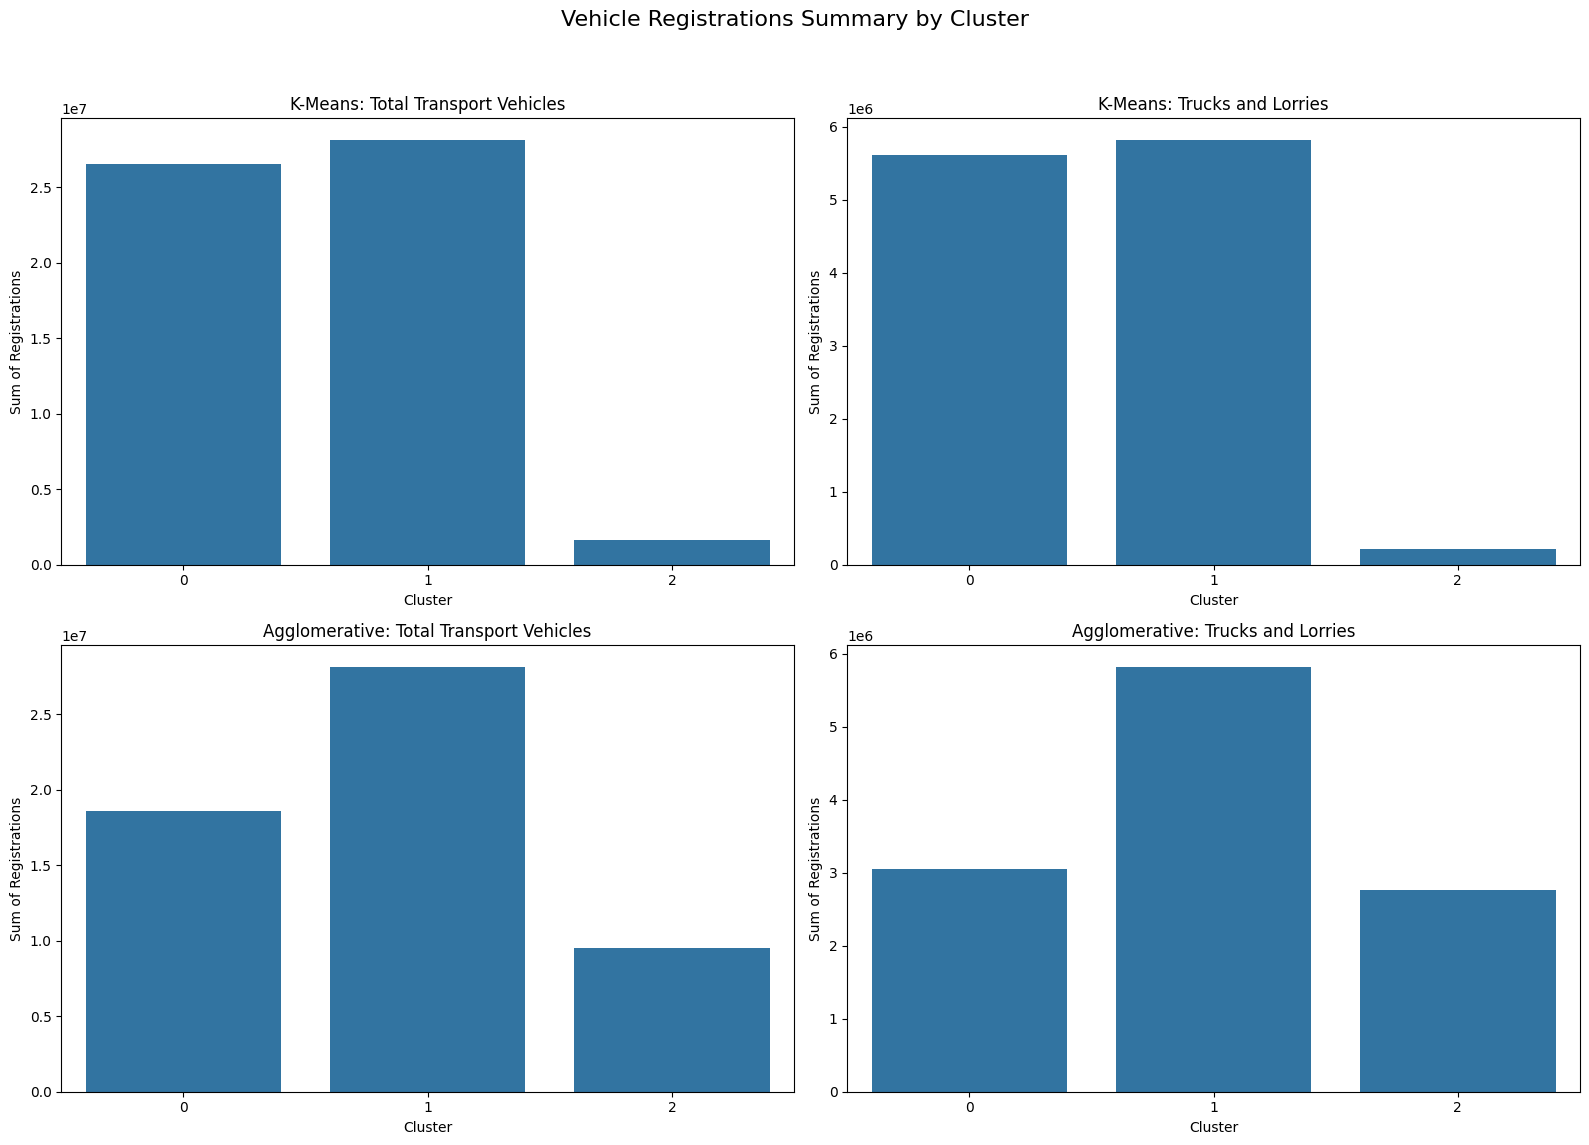

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization and interpretation, let's analyze the sum of vehicle registrations
# in each cluster for a few selected categories. We'll focus on:
# - Total Transport (I TO VII)
# - Trucks and Lorries (II)
# - Light Motor Vehicles (Passengers) (VI) - Four to six seaters
# - Motor cycles on hire (VII)

# Summing up the registrations in each cluster for both clustering methods
kmeans_summed = df.groupby('KMeans_Cluster')[['Total Transport (I TO VII)', 'Trucks and Lorries (II)', 'Light Motor Vehicles (Passengers) (VI) - Four to six seaters', 'Motor cycles on hire (VII)']].sum()
agglomerative_summed = df.groupby('Agglomerative_Cluster')[['Total Transport (I TO VII)', 'Trucks and Lorries (II)', 'Light Motor Vehicles (Passengers) (VI) - Four to six seaters', 'Motor cycles on hire (VII)']].sum()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Vehicle Registrations Summary by Cluster', fontsize=16)

# KMeans
sns.barplot(ax=axes[0, 0], x=kmeans_summed.index, y="Total Transport (I TO VII)", data=kmeans_summed)
axes[0, 0].set_title('K-Means: Total Transport Vehicles')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Sum of Registrations')

sns.barplot(ax=axes[0, 1], x=kmeans_summed.index, y="Trucks and Lorries (II)", data=kmeans_summed)
axes[0, 1].set_title('K-Means: Trucks and Lorries')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Sum of Registrations')

# Agglomerative
sns.barplot(ax=axes[1, 0], x=agglomerative_summed.index, y="Total Transport (I TO VII)", data=agglomerative_summed)
axes[1, 0].set_title('Agglomerative: Total Transport Vehicles')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Sum of Registrations')

sns.barplot(ax=axes[1, 1], x=agglomerative_summed.index, y="Trucks and Lorries (II)", data=agglomerative_summed)
axes[1, 1].set_title('Agglomerative: Trucks and Lorries')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Sum of Registrations')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
Observations:
Total Transport Vehicles: There's a clear distinction in the sum of total transport vehicle registrations between the clusters, particularly noticeable in both clustering methods. Cluster 1, which mainly represents the aggregate 'Total' data, is excluded from this comparison for obvious reasons. The differences between clusters suggest varying levels of vehicle registrations, potentially reflecting economic activity, urbanization, and transportation needs within those clusters.

Trucks and Lorries: Similar to the total transport vehicles, the sum of trucks and lorries registrations varies significantly across clusters. This variation highlights differences in commercial transportation and logistics activities among the clusters.

Recommendations Supported by Plots:
High Economic Activity Areas (Cluster 0 in K-means and Agglomerative): The higher vehicle registrations in these clusters suggest targeting these areas for a broad range of vehicles. Given the significant number of trucks and lorries, there is evident commercial activity, indicating a strong market for commercial vehicles as well as personal vehicles due to urbanization.

Emerging Markets (Cluster 2 in K-means and Agglomerative): The lower but still significant vehicle registrations suggest these could be emerging markets or areas with different transportation needs. Marketing campaigns here could focus on cost-effective and versatile vehicles suitable for both urban and rural settings, emphasizing fuel efficiency, durability, and affordability.